# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import requests
import json
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "./output_data/cities.csv"
output_data_file = "citiesA.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)  #cities is a list of city names

# Print the city count to confirm sufficient count
len(cities)


592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# for i in range(0, 3):
#         print(cities[i])

In [5]:
column_names = ['City','Cloudiness','Country',
                'Date','Humidity','Lat','Lng',
                'Max Temp','Wind Speed']

weather = []

print('Beginning Data Retrieval')
print("------------------------------")
for i in range(0, 100):
    url="http://api.openweathermap.org/data/2.5/weather?q="+cities[i]+"&appid=283a9319d8bc008a581bb0b88d702293"
    #print(url)
    
    try: 
        response = requests.get(url).json()
        #print(f"Processing data for {response['name']} \t \t city number: {response['id']}")
        print("Processing Record \033[36m {0}\033[0m of Set \033[36m {1} \033[0m | {2}".format(i, i, cities[i]))
#     weather.append([response['id'], response['name'], response['clouds']['all'], 
#                     response['sys']['country'], 
#                     response['dt'], response['main']['humidity'], response['coord']['lat'], 
#                     response['coord']['lon'], response['main']['temp_max'], 
#                     response['wind']['speed']])
    
        weather.append([response['name'], response['clouds']['all'], 
                    response['sys']['country'], 
                    response['dt'], response['main']['humidity'], response['coord']['lat'], 
                    response['coord']['lon'], response['main']['temp_max'], 
                    response['wind']['speed']])
    except:
        print('City \033[1m not \033[0m found. Skipping...')
# for row in weather:
#     print(row)

df = pd.DataFrame(weather, columns=column_names)
df


Beginning Data Retrieval
------------------------------
Processing Record  0 of Set  0  | mountain home
Processing Record  1 of Set  1  | chokurdakh
Processing Record  2 of Set  2  | mezen
Processing Record  3 of Set  3  | ushuaia
Processing Record  4 of Set  4  | butaritari
Processing Record  5 of Set  5  | tasiilaq
Processing Record  6 of Set  6  | avarua
Processing Record  7 of Set  7  | mayumba
Processing Record  8 of Set  8  | mataura
Processing Record  9 of Set  9  | maniitsoq
Processing Record  10 of Set  10  | bilibino
Processing Record  11 of Set  11  | airai
Processing Record  12 of Set  12  | jamestown
Processing Record  13 of Set  13  | leningradskiy
Processing Record  14 of Set  14  | rikitea
Processing Record  15 of Set  15  | mufulira
Processing Record  16 of Set  16  | vaini
Processing Record  17 of Set  17  | arkhangelsk
Processing Record  18 of Set  18  | east london
Processing Record  19 of Set  19  | port hardy
Processing Record  20 of Set  20  | puerto ayora
Proces

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mountain Home,20,US,1583852889,100,43.13,-115.69,275.93,0.85
1,Chokurdakh,0,RU,1583852669,93,70.63,147.92,237.41,1.63
2,Mezen',100,RU,1583852956,89,65.85,44.24,274.71,5.67
3,Ushuaia,20,AR,1583852728,70,-54.80,-68.30,282.15,1.40
4,Butaritari,100,KI,1583852673,78,3.07,172.79,301.91,7.53
...,...,...,...,...,...,...,...,...,...
83,Tanabe,27,JP,1583852972,81,33.73,135.37,287.04,1.34
84,Shache,94,CN,1583852972,31,38.42,77.24,281.31,4.67
85,Bad Kissingen,100,DE,1583852826,93,50.20,10.08,280.93,4.47
86,San Patricio,20,MX,1583852972,78,19.22,-104.70,298.15,2.60


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df.to_csv (output_data_file, header=True)  
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mountain Home,20,US,1583852889,100,43.13,-115.69,275.93,0.85
1,Chokurdakh,0,RU,1583852669,93,70.63,147.92,237.41,1.63
2,Mezen',100,RU,1583852956,89,65.85,44.24,274.71,5.67
3,Ushuaia,20,AR,1583852728,70,-54.80,-68.30,282.15,1.40
4,Butaritari,100,KI,1583852673,78,3.07,172.79,301.91,7.53
...,...,...,...,...,...,...,...,...,...
83,Tanabe,27,JP,1583852972,81,33.73,135.37,287.04,1.34
84,Shache,94,CN,1583852972,31,38.42,77.24,281.31,4.67
85,Bad Kissingen,100,DE,1583852826,93,50.20,10.08,280.93,4.47
86,San Patricio,20,MX,1583852972,78,19.22,-104.70,298.15,2.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

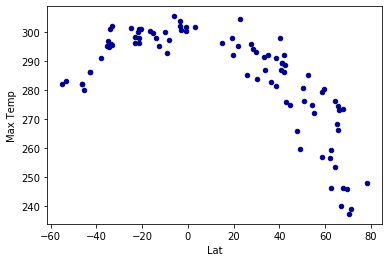

In [7]:
ax1 = df.plot.scatter(x='Lat',
                      y='Max Temp',
                      c='DarkBlue')

#### Latitude vs. Humidity Plot

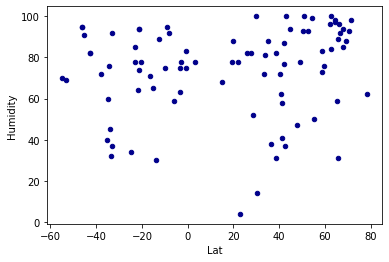

In [8]:
ax1 = df.plot.scatter(x='Lat',
                      y='Humidity',
                      c='DarkBlue')

#### Latitude vs. Cloudiness Plot

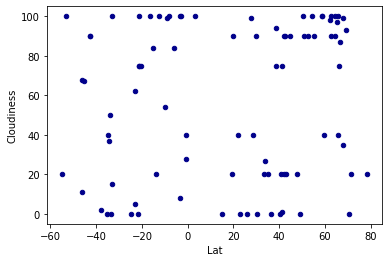

In [9]:
ax1 = df.plot.scatter(x='Lat',
                      y='Cloudiness',
                      c='DarkBlue')

#### Latitude vs. Wind Speed Plot

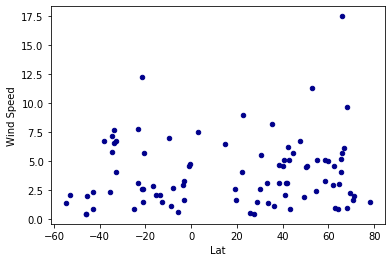

In [10]:
ax1 = df.plot.scatter(x='Lat',
                      y='Wind Speed',
                      c='DarkBlue')

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots

# Calculate the correlation coefficient and linear regression 
# model for mouse weight and average tumor volume for the Capomulin regimenn
# Use sci pi to the the pearson r measure of correlation (r value)

def plot_linear_regression(x_values, y_values, x_label, y_label):
    #correlation = st.pearsonr(x_values, y_values)
    # Pretty print the results
    
    # Do a line regression on x and y values to calculate values for the line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    print('The correlation between ' + x_label + 
      '\033[1m and \033[0m' +
      'the ' + y_label +
      '\033[1m is \033[0m' + 
       f'\033[36m {rvalue:2.2f} \033[0m')
    
    print('The r-squared' + '\033[1m is \033[0m' + f'\033[36m {rvalue:2.6f} \033[0m')



    # Create a scatter plot of weight versus average tumor volume
    plt.scatter(x_values,y_values)
    # Add a red line to indicate the correlation
    plt.plot(x_values,regress_values,"r-")
    # Create labels for the axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(x_label+" Versus "+ y_label)

    # Show the plot
    plt.show()

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df[df['Lat'] > 0] 
southern_df = df[df['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Max Temp and the Latitude is  -0.84 
The r-squared is  -0.836167 


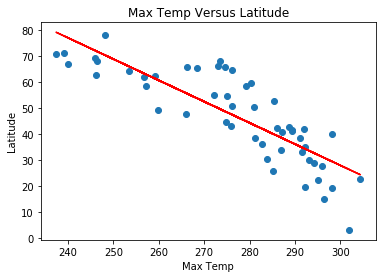

In [13]:
plot_linear_regression(northern_df['Max Temp'], northern_df['Lat'], "Max Temp", "Latitude")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between Max Temp and the Latitude is  0.79 
The r-squared is  0.791700 


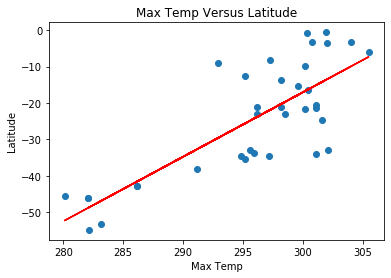

In [14]:
plot_linear_regression(southern_df['Max Temp'], southern_df['Lat'], "Max Temp", "Latitude")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [15]:
northern_df.columns

Index(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng',
       'Max Temp', 'Wind Speed'],
      dtype='object')

The correlation between Humidity and the Latitude is  0.29 
The r-squared is  0.294678 


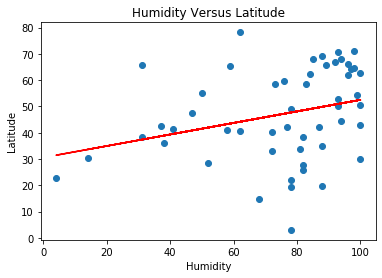

In [16]:
plot_linear_regression(northern_df['Humidity'], northern_df['Lat'], "Humidity", "Latitude")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Humidity and the Latitude is  0.02 
The r-squared is  0.023679 


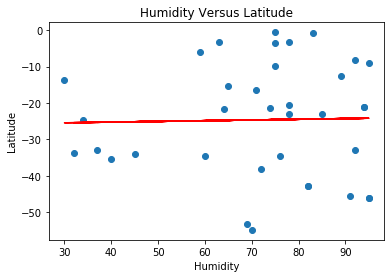

In [17]:
plot_linear_regression(southern_df['Humidity'], southern_df['Lat'], "Humidity", "Latitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Cloudiness and the Latitude is  0.28 
The r-squared is  0.281864 


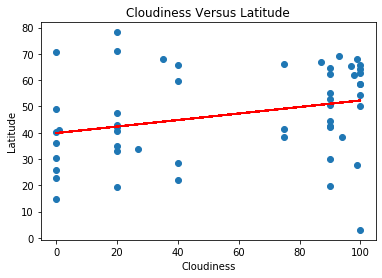

In [18]:
plot_linear_regression(northern_df['Cloudiness'], northern_df['Lat'], "Cloudiness", "Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Cloudiness and the Latitude is  0.18 
The r-squared is  0.184643 


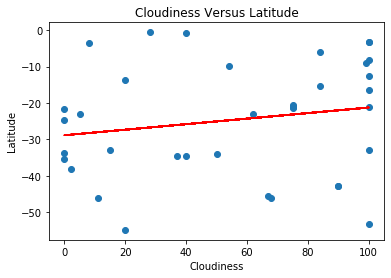

In [19]:
plot_linear_regression(southern_df['Cloudiness'], southern_df['Lat'], "Cloudiness", "Latitude")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Wind Speed and the Latitude is  0.03 
The r-squared is  0.030945 


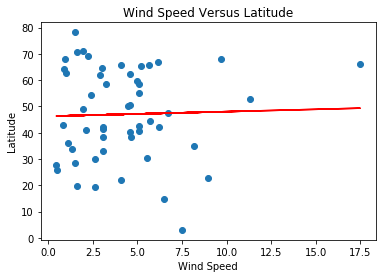

In [20]:
plot_linear_regression(northern_df['Wind Speed'], northern_df['Lat'], "Wind Speed", "Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Wind Speed and the Latitude is  0.05 
The r-squared is  0.045942 


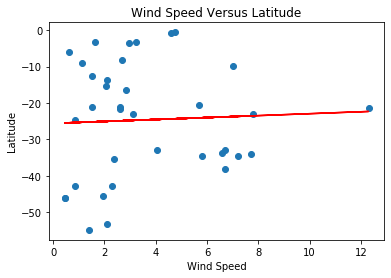

In [21]:
plot_linear_regression(southern_df['Wind Speed'], southern_df['Lat'], "Wind Speed", "Latitude")